<a href="https://colab.research.google.com/github/bcaffo/ds4ph-bme/blob/master/notebooks/basicRegressionNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import torch
import statsmodels.formula.api as smf
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt


## Download in the data if it's not already there
! if [ ! -e oasis.csv ];\
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv; \
fi;

## Read in the data and display a few rows
dat = pd.read_csv("oasis.csv")
dat.head(4)


,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0


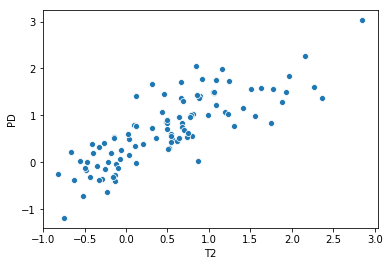

In [0]:
sns.scatterplot(dat['T2'], dat['PD'])

In [0]:
fit = smf.ols('PD ~ T2', data = dat).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PD   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     190.9
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           9.77e-25
Time:                        00:53:57   Log-Likelihood:                -57.347
No. Observations:                 100   AIC:                             118.7
Df Residuals:                      98   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3138      0.052      6.010      0.000       0.210       0.417
T2             0.7832      0.057     13.815      0.000       0.671       0.896
==============================================================================
Omnibus:                        1.171   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.972
Skew:                           0.241   Prob(JB):                        0.615
Kurtosis:                       2.995   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

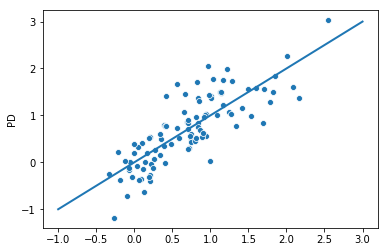

In [0]:
# The in sample predictions
yhat = fit.predict(dat['T2'])

# Make sure that it's adding the intercept
#test = 0.3138 + dat['T2'] * 0.7832
#sns.scatterplot(yhat,test)

## A plot of the in sample predicted values
## versus the actual outcomes
sns.scatterplot(yhat, dat['PD'])
plt.plot([-1, 3], [-1, 3], linewidth=2)

In [0]:
n = dat.shape[0]

## Get the y and x from 
xtraining = torch.from_numpy(dat['T2'].values)
ytraining = torch.from_numpy(dat['PD'].values)

## PT wants floats
xtraining = xtraining.float()
ytraining = ytraining.float()

## Dimension is 1xn not nx1
## squeeze the second dimension
xtraining = xtraining.unsqueeze(1)
ytraining = ytraining.unsqueeze(1)

## Show that everything is the right size
[xtraining.shape, 
 ytraining.shape,
 [n, 1]
 ]



[torch.Size([100, 1]), torch.Size([100, 1]), [100, 1]]

In [0]:
## Show that linear regression is a pytorch 
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1)
)

## MSE is the loss function
loss_fn = torch.nn.MSELoss(reduction='sum')

## Set the optimizer
## There are lots of choices
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

## Loop over iterations
for t in range(10000):

    ## Forward propagation
  y_pred = model(xtraining)
    
  ## the loss for this interation
  loss = loss_fn(y_pred, ytraining)

  #print(t, loss.item() / n)

  ## Zero out the gradients before adding them up 
  optimizer.zero_grad()
  
  ## Backprop
  loss.backward()
  
  ## Optimization step
  optimizer.step()



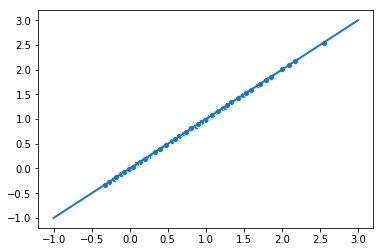

In [0]:
ytest = model(xtraining).detach().numpy().reshape(-1)
sns.scatterplot(ytest, yhat)
plt.plot([-1, 3], [-1, 3], linewidth=2)

In [0]:
for param in model.parameters():
  print(param.data)


tensor([[0.7831]])
tensor([0.3138])
